<a href="https://colab.research.google.com/github/spradeepgit/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Libraries -**

In [ ]:
# First, Let's Import the "Libraries" -
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

! pip install plotly
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading Data

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Almabetter Projects/Airbnb/Airbnb NYC 2019.csv'

In [ ]:
# importing csv file into Pandas dataframe.
df_Listings=pd.read_csv(file_path)

In [ ]:
#Checking the "Shape" of this DataFrame.
df_Listings.shape
    # So, we can see over here that we've somewhere around "1.20K" Rows and "20" Columns in this DataSet.

(48895, 16)

In [ ]:
#Checking the different 'Columns' available -
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#Check the Data Types of Each and Every "Column".
df_Listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Inference :

After running the above code you will get a report as shown in the above figure. This report contains various sections or tabs. ‘Overview’ section of this report provides us with all the basic information of the data we are using. For the data, We are using, we got the following information:

*   Number of Variables = 16
*   Number of Rows = 48895
*   Duplicate Rows = 0
*   Number of Numerical Features = 10
*   Number of Categorical Features = 6

## Data Preparation / Pre-processing -

In [ ]:
df_Listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_Listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df_Listings.shape

(48895, 16)

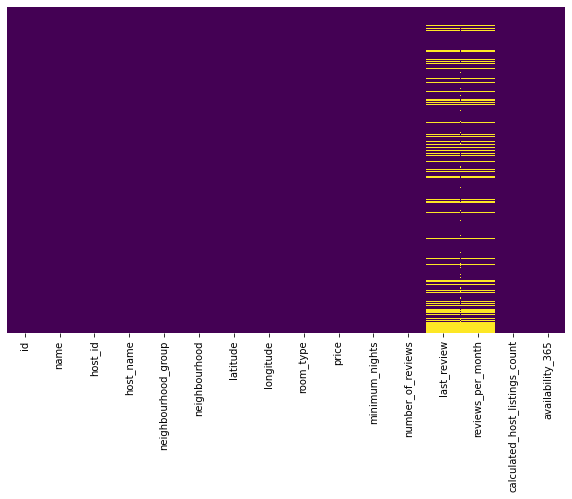

In [ ]:
#Plot the Missing Data on HeatMap -
plt.figure(figsize=(10,6))
sns.heatmap(df_Listings.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

## Handling Missing Values - (Data Cleaning):

In [ ]:
df_Listings.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Data Cleaning & Imputation : "name" Feature -

In [ ]:
#Computing the Mode of this Feature -
Mode = df_Listings["name"].mode()
Mode

0    Hillside Hotel
dtype: object

In [ ]:
#Now, Checking the Occurence of the Data - 
df_Listings['name'].value_counts().head()

Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
Name: name, dtype: int64

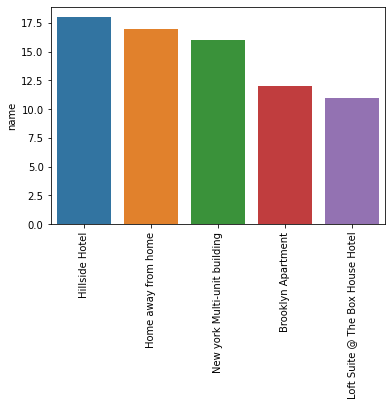

In [ ]:
#Just, Plot this Data using CountPlot -
sns.barplot(x = df_Listings['name'].value_counts().head().index,
           y = df_Listings['name'].value_counts().head())

plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Let’s Replace the Null Value available in the "name" Column -
df_Listings['name'].fillna(value = 'Home away from home', axis = 'index', inplace = True)

In [ ]:
#Now, Cross-Check the Null Values -
df_Listings['name'].isnull().sum()

#Now, We can see, We've successfully 'impute'/'substitute' our "Category Data" with "Mode" Value.

0

### Data Cleaning : neighbourhood_group

In [ ]:
#Dropping this Column as it has 100% Missing Data -
df_Listings.drop(labels = 'neighbourhood_group', axis = 'columns', inplace = True)

### Data Cleaning & Imputation : host_name

In [ ]:
#Checking the Null/Missing Values -
df_Listings['host_name'].isnull().sum()

21

In [ ]:
#Computing the "Mode" of this Feature -
df_Listings['host_name'].mode()

0    Michael
dtype: object

In [ ]:
#Computing the "Mode" of this Feature -
df_Listings['host_name'].mode()

0    Michael
dtype: object

In [ ]:
#Checking the Occurence of the Data - 
df_Listings['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
#Substituting/Inputing the Null/Missing Data -
df_Listings['host_name'].fillna(value = 'Michael', axis = 'index', inplace = True)

In [ ]:
#Cross-Check the Null Values -
df_Listings['host_name'].isnull().sum()

0

## @Regarding the Host -


*   Who are Top Earners?
*   Is there any Relationship between host_name and Prices?



In [ ]:
df_Listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Q1. Who are Top Earners in terms of Host Names?

df_data = df_Listings.groupby(['host_name'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
df_data = df_data.round(decimals = 2)
df_data

,host_name,price
8034,Olson,9999.00
8986,Rum,8500.00
4663,Jay And Liz,6000.00
9223,Sarah-B,5000.00
9222,Sarah-2,5000.00
7905,Nony,4200.00
5423,Kathrine,3501.67
4757,Jelena,3400.00
6399,Luxury Property,3000.00
8859,Rogelio,2999.00


In [ ]:
#Now, Let's Plot this Data -
fig = px.bar(data_frame = df_data, 
             x = df_data['price'], 
             y = df_data['host_name'],
             color = 'price',
            text = 'price',
            labels = {'host_name':'Name of the Hosts', 'price':'Avg. Earnings'})

fig.update_layout(template = 'plotly_dark', title_text = "Top 20 Earners in terms of Host Names")
fig.show()

### Conclusion -
*   In the above Chart, we've listed/ploted **Top 20 Earners** in terms of Hosts, one after the other.
*   From the above visual, We can say that **"Olson" is the Top Earner** followed by "Rum" and "Jay And Liz".

## Conclusions -


*   From this, you can come up with Various Conclusions like -
*   Bigger the Bubble, higher the Price is... Similarly, Smaller the Bubble, lesser the Price is...
*   As the "Price" increases, we can see that "Monthly Earning" decreases. This might be happened because Most of the Guests prefer Affordable/Budget-Friendly Rooms and We can also confirm the same from above plot Dense Area (High density).
*   Moreover, We can also say that, Some Rooms made great Fortune which are having Meager Price (I.e. '195'), has Monthly Earning of "60K".
*   On the other hand, the Expensive Rooms which are having More Price, We can say that, those doesn't make Much Earnings. Same we can see, For Price "1545", "1430", "1295", and "1200", the Monthly Earnings were "9579", "20K", "8500", and "5000" respectively. This was again happened because Most of the Guests prefer Affordable/Budget-Friendly Rooms.
*   So, that's a Conclusion you can drawn from this Scatter Plot.

In [ ]:
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#Q3. Price comparison in terms of "property_type", And "room_type".
data = df_Listings.groupby('room_type')['price'].agg('mean').to_frame()
data.sort_values(by='price', ascending=False)

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [ ]:
#Q3. Price comparison in terms of "property_type", And "room_type".
data_df = df_Listings.groupby(['room_type'], as_index=False)['price'].agg('mean')
#data_df.sort_values(by='price', ascending=False, inplace=True)
data_df.head()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


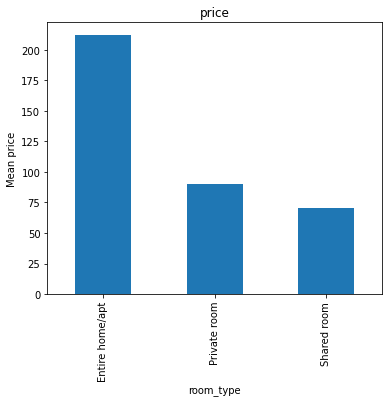

In [ ]:
#df = df.replace(np.nan, 0)
data_df = data_df.groupby(['room_type'])['price'].mean()

data_df.plot(kind='bar', title='price', ylabel='Mean price',label='room_type', figsize=(6, 5))

## Conclusions -


*   From this "Bar Plot", We can say, the "Villa", "Castle", "Hotel", "Boat", "House", etc. These are the Most Expensive "Property Types" in terms of "Entire Home/Apt.".
*   Next, In terms of "Private Room", "Castle", "Condohotel", "Resort", "Boutique Hotel", "Hotel", etc. are the Most Expensive "Property Types".
*   Similarly, In terms of "Shared Room", We can see that "Hotel", "Apartment", "Condominium", "Town House", "House", etc. are the Most Expensive "Property Types".

### Most Preferred "Room Type" by Guests - OR
### To know which Room Type got more Number of Bookings:

In [ ]:
#Q4. Preference of Guests w.r.t. room Type -
df = df_Listings['room_type'].value_counts()
df = df.reset_index()#(inplace=True)
df.columns = ['room_Type', 'Count']
df.head()

,room_Type,Count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


In [ ]:
#Now, Let's Plot this Data -
fig = px.treemap(df, path = ['room_Type', 'Count'],
                 values = 'Count', 
                 color='Count', 
                 title='Preference of Guests w.r.t. room Type')

fig.show()